# Titanic data

* Kaggle Link  
https://www.kaggle.com/competitions/titanic
<p>
* Data Dictionary infomation
<pre>
Variable    Definition          Key
survival    Survival            0 = No, 1 = Yes
pclass      Ticket class        1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation  C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

## Data Load후 확인할 내용


###  1. head(), info(), shape

In [2]:
train = pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.shape

(891, 12)

In [5]:
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 결측값 확인

In [7]:
train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64


<pre>
col     cnt   nan_cnt   rate

age     891      177      23%


In [8]:
# col = pd.Series(train.columns, index= train.columns)
cnt = train.count()
nan_cnt = train.isna().sum()
rate = np.round((nan_cnt/(cnt+nan_cnt))*100, 2)
rdf = pd.concat([cnt, nan_cnt, rate], axis=1, ignore_index=True)
rdf.columns = ['cnt','nan_cnt','nan_rate']
rdf

,cnt,nan_cnt,nan_rate
passengerid,891,0,0.00
survived,891,0,0.00
pclass,891,0,0.00
name,891,0,0.00
sex,891,0,0.00
age,714,177,19.87
sibsp,891,0,0.00
parch,891,0,0.00
ticket,891,0,0.00
fare,891,0,0.00


In [9]:
col = train.columns
cnt = train.notna().sum()
nan_cnt = train.isna().sum()
rate = np.round((nan_cnt/train.shape[0])*100, 2)
unique_cnt = train.nunique()
dic = {'col':col, 'cnt':cnt,'nan_cnt':nan_cnt,'nan_rate':rate, "unique_cnt":unique_cnt}
rdf = pd.DataFrame(dic)
rdf.sort_values("nan_cnt", ascending=False)

,col,cnt,nan_cnt,nan_rate,unique_cnt
cabin,cabin,204,687,77.10,147
age,age,714,177,19.87,88
embarked,embarked,889,2,0.22,3
passengerid,passengerid,891,0,0.00,891
survived,survived,891,0,0.00,2
pclass,pclass,891,0,0.00,3
name,name,891,0,0.00,891
sex,sex,891,0,0.00,2
sibsp,sibsp,891,0,0.00,7
parch,parch,891,0,0.00,7


### 3. 중복값 확인
    * df[컬럼].unique()
    * df[컬럼].nunique()

* select distinct sex from titanic

In [10]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
train['sex'].nunique()

2

In [12]:
# 컬럼별 unique 개수
train.nunique().sort_values(ascending=False)

passengerid    891
name           891
ticket         681
fare           248
cabin          147
age             88
sibsp            7
parch            7
pclass           3
embarked         3
survived         2
sex              2
dtype: int64

In [13]:
for col in train.columns:
    if train[col].nunique() < 100:
        print(col, train[col].nunique(), train[col].unique())

survived 2 [0 1]
pclass 3 [3 1 2]
sex 2 ['male' 'female']
age 88 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp 7 [1 0 3 4 2 5 8]
parch 7 [0 1 2 5 3 4 6]
embarked 3 ['S' 'C' 'Q' nan]


<b>* Survived</b>

# EDA (Titanic data)
* (Exploratory Data Analysis, 탐색적 데이터 분석)
* 통계적 분석 & 차트 (시각화)

### *Draw Chart

In [14]:
## ! pip install matplotlib

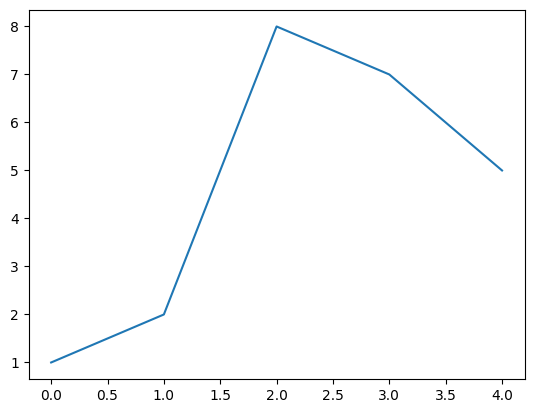

In [15]:
import matplotlib.pyplot as plt

plt.plot([1,2,8,7,5])
plt.show()

## passengerid
* unique해서 패턴을 보이지 않음. -- 분석 x

In [16]:
train = train.drop('passengerid',axis=1)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## survived
* Target
* 비율 분석

0    549
1    342
Name: survived, dtype: int64


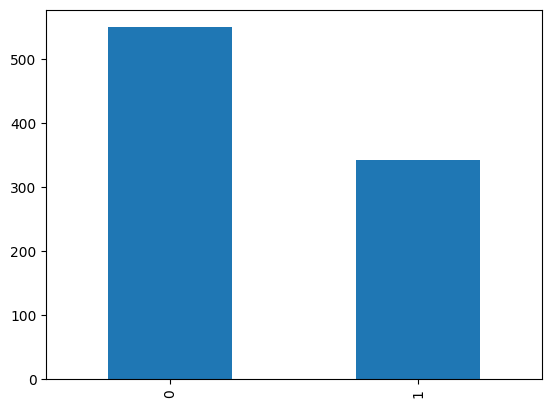

In [17]:
print(train['survived'].value_counts())
train['survived'].value_counts().plot(kind='bar')
plt.show()

In [18]:
train.groupby('survived')['survived'].count()

survived
0    549
1    342
Name: survived, dtype: int64

## pclass
* 주요 Feature
* target(survived)와 연관성을 보임 

1    216
2    184
3    491
Name: pclass, dtype: int64


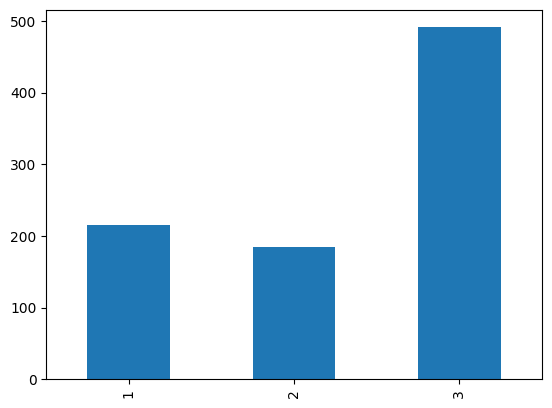

In [19]:
print(train['pclass'].value_counts().sort_index())
train['pclass'].value_counts().sort_index().plot(kind='bar')
plt.show()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


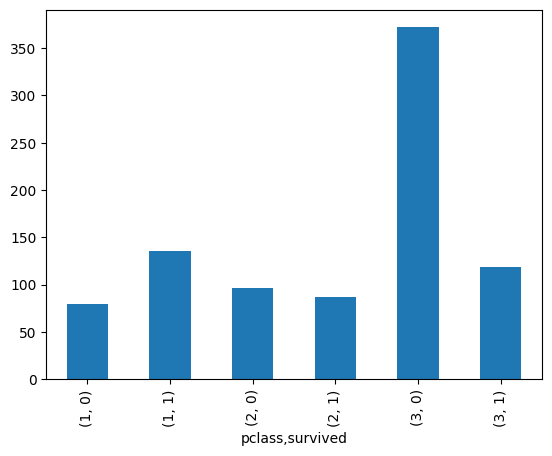

In [20]:
print(train[['pclass','survived']].value_counts().sort_index())

train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## cabin
* 연관성 없어 보임
* class가 높은 사람이 A, B, C인듯 함. 즉 cabin은 pclass의 sub임.   
    * Survived와의 연관성을 확인하려 할 때,   
        survived와 pclass와의 비교는 유의미하나,   
        pclass의 sub group인 cabin과 survived를 비교하는 것은 의미가 없어 보임

In [21]:
# cabin과 survived의 관계는 없어 보임.
# cabin에서 초기 1글자만 잘라서 survived와 연관성 비교
train['cabin2'] = train['cabin'].str[:1]
train[['cabin2','survived']].value_counts().sort_index()

cabin2  survived
A       0            8
        1            7
B       0           12
        1           35
C       0           24
        1           35
D       0            8
        1           25
E       0            8
        1           24
F       0            5
        1            8
G       0            2
        1            2
T       0            1
dtype: int64

## embarked

* survived와이 연관성이 크지 않음...
* C에서 승선한 사람은 살아남은 비율이 더 높고, Q,S에서 승선한 사람은 죽은 비율이 더 높다.  
    but 그 비율의 차이가 크지 않음  
    특히 대부분의 사람들이 S에서 승선함.  

In [22]:
# embarked 결측확인
train['embarked'].isna().sum()

2

* embarked의 null은 최빈값을 처리
    * null 처리를 어떻게 할거냐
    * 최빈값인 S로 대체함.
    * 현업이라면 데이터가 적어도 해당 데이터를 함부로 지울수는 없다.

In [23]:
# 특정 컬럼의 최빈값을 가져오는 함수 mode()
# 최빈값을 영어로 하면 mode임.
embarked_mode = train['embarked'].mode().values[0]
## mode쓰면 array 출력하니까 [0]번째 값 출력
# train['embarked'] = np.where(train['embarked'].isna(), embarked_mode, train['embarked'])
train['embarked'] = train['embarked'].fillna(embarked_mode)

# 확인용
train['embarked'].isna().sum()

0

In [24]:
train[['embarked', 'survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [25]:
df1 = train[['embarked']][train['survived']==1].value_counts()
df2 = train[['embarked']].value_counts()
rate = df1/df2*100
rate.sort_values(ascending=False)  # 살아남은 비율

embarked
C           55.357143
Q           38.961039
S           33.900929
dtype: float64

### *object type, describe()
* object type에 대해서 describe를 하면, unique개수와 가장 자주 등장하는 값(top), 그 자주 등장하는 값이 몇번 나왔는지(frequency)를 알려줌

In [26]:
train[['embarked','sex']].describe()

,embarked,sex
count,891,891
unique,3,2
top,S,male
freq,646,577


## sex
* 주요 Feature

In [27]:
train['sex'].isna().sum()  # null 값 없음

0

In [28]:
# 여자의 생존 확률이 더 높음. # 성별은 주요 Feature
train[['sex', 'survived']].value_counts().sort_index()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

## name
* name 정보에서 Mr, Mrs, Miss 등의 값만 뽑아서 특징으로 사용

### *정규표현패턴 값추출

* 정규표현식

|메타문자| |사용예|설명|
|------|---|---|---|
|[ ]|문자 클래스|[abc]|a, b, c 중 한 개의 문자와 매치                              &nbsp;|
|[s-e]| |[0-2]<br>[a-c]<br>[a-zA-Z]<br>[0-9]|0,1,2<br>a,b,c<br>알파벳모두<br>숫자|
|^|반대|[^0-9]|숫자가 아닌 문자와 매치|
|<font color=red size=4><b>?|0또는1글자<br>(있어도 되고 없어도 되고)|ab?c|?앞에 문자 b를 0 또는 1번 반복<br>O abc<br>O ac<br>X abbc|
|<font color=red size=4><b>.|1글자|a.b<br>a[.]b|a + 모든문자 + b<br>a + Dot(.)문자 + b|
|<font color=red size=4><b>*|반복 0~|ca*t| *앞에 문자 a를 0~ 반복<br>O ct<br>O cat<br>O caaat|
|<font color=red size=4><b>+|반복 1~|ca+t| +앞에 문자 a를 1~ 반복<br>X ct<br>O cat<br>O caaat|  
|{s,e}|반복 s~e|{3,5}<br>{3, }<br>{ ,5}<br>{1, }<br>{0, }<br>ca{2}t<br> <br> <br>ca{2,4}t<br> <br> <br> <br>|3이상 ~ 5이하 반복<br>3~ 이상 반복<br>~5 이하 반복<br>+<br>*<br>{2}앞에 문자a를 2번반복<br>X cat<br>O caat<br>{2}앞에 문자a를 2 ~ 4번반복<br>X cat<br>O caat<br>O caaaat|

|종류|문자클래스|설명|유사표현|
|------|---|---|---|
|숫자|<font color=red size=3><b>\d|숫자와 매치|[0-9]|
||<font color=red size=3><b>\D|숫자가 아닌 것과 매치|[^0-9]|
|숫자+문자|<font color=red size=3><b>\w|문자+숫자(alphanumeric)와 매치|[a-zA-Z0-9]|
||<font color=red size=3><b>\W|문자+숫자(alphanumeric)가 아닌 문자와 매치|[^a-zA-Z0-9]|
|특수문자|<font color=red size=3><b>\s|whitespace 문자와 매치|[ \t\n\r\f\v]|
||<font color=red size=3><b>\S|whitespace 문자가 아닌 것과 매치|[^ \t\n\r\f\v]|

<pre> 
f"_______"
^…$	Starts and ends
(…)	Capture Group
(a(bc))	Capture Sub-group
(.*)	Capture all
(abc|def)	Matches abc or def

* 정규표현식패턴으로 dataframe에서 특정값 추출하기
    * train['name'].str.extract('정규표현식패턴')

In [29]:
# trvain['name_title']=train['name'].str.extract(', (\w+).')
train['name_title']=train['name'].str.extract('\s([\w]+)[.]\s')
train['name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: name_title, dtype: int64

* 일부 이름 구분 변경.

<pre>
Rev   목사 --> Mr  
Major 미군 --> Mr
Major 대령 --> Mr
Col. 미군장교 --> Mr
Capt   선생님, 공군    --> Mr
Sir  귀족남성 --> Mr
Don   남성 --> Mr
Jonkheer  작위가없는 귀족  --> Mr 

Mlle  나이어린여아 --> Miss
Ms     여성    --> Miss
Lady  나이어린여자 --> Miss

Countess 백작부인 --> Mrs
Mme  마담 --> Mrs

### *Feature값 변경
1) df = df.replace('A','B')
2) df = df.map({'A':'B'})
3) df = df.apply(lambda)
4) df.loc(줄, 칸) = 변경값

#### replace()

In [30]:
traincp = train.copy()
traincp['pclass'] = traincp['pclass'].replace(3, 33) # --- 3을 33으로
traincp['pclass'] = traincp['pclass'].replace([1,2,3], [11,22,33])
traincp.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,0,33,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss


#### map()

In [31]:
dic = {"male":1,"female":0}
traincp['sex'] = traincp['sex'].map(dic)
traincp.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,0,33,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss


#### apply(lambda)

In [32]:
traincp['sex'] = traincp['sex'].apply(lambda x: 'male' if x == 1 else 'female')
traincp.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,0,33,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss


* 연습용

In [33]:
traincp['name_title2'] = traincp['name_title']
traincp['name_title2'] = traincp['name_title2'].replace(['Rev','Major','Major','Col','Capt','Sir','Don','Jonkheer'],
                              ['Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr'])
traincp['name_title2'] = traincp['name_title2'].replace(['Mlle','Ms','Lady'],['Miss','Miss','Miss'])
traincp['name_title2'] = traincp['name_title2'].replace(['Countess','Mme'],['Mrs','Mrs'])

traincp['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [34]:
traincp[['name_title', 'name_title2']]

,name_title,name_title2
0,Mr,Mr
1,Mrs,Mrs
2,Miss,Miss
3,Mrs,Mrs
4,Mr,Mr
...,...,...
886,Rev,Mr
887,Miss,Miss
888,Miss,Miss
889,Mr,Mr


In [35]:
traincp['name_title2'] = traincp['name_title']
traincp['name_title2'] = traincp['name_title2'].replace(['Rev','Major','Major','Col','Capt','Sir','Don','Jonkheer'],
                              ['Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr'])
traincp['name_title2'] = traincp['name_title2'].replace(['Mlle','Ms','Lady'],['Miss','Miss','Miss'])

# map을 사용하면, dictionary에 포함되지 않은 value들은 모두 nan으로 변함.
# map을 사용하려면 변경하려는 조건들을 모두 한번에 넣어야한다.
# dic = {'Mlle':'Miss',
#       'Ms':'Miss',
#       'Lady':'Miss'}
# traincp['name_title2'] = traincp['name_title2'].map(dic)

traincp['name_title2'] = traincp['name_title2'].apply(lambda x: 'Mrs' if x in ['Countess','Mme'] else x)

traincp['name_title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [36]:
del traincp

### 원본 name_title 값 변경

* 원본 dataframe train['name_title']에 replace한 값 train['name_title2']로 넣음

In [37]:
train['name_title2'] = train['name_title']
train['name_title2'] = train['name_title2'].replace(['Rev','Major','Major','Col','Capt','Sir','Don','Jonkheer'],
                              ['Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr'])
train['name_title2'] = train['name_title2'].replace(['Mlle','Ms','Lady'],['Miss','Miss','Miss'])
train['name_title2'] = train['name_title2'].replace(['Countess','Mme'],['Mrs','Mrs'])
train['name_title2'].value_counts()

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: name_title2, dtype: int64

## age
* age의 결측 177개, 이에 대한 결측처리 필요
* 호칭별 평균 나이로 age의 결측을 처리함

In [38]:
train['age'].isna().sum()

177

In [39]:
# 데이터의 쏠림 현상인 왜도가 나타남
train['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

* 호칭별 평균나이로 결측처리

In [40]:
train[train['age'].notna()].groupby('name_title2')['age'].mean()

name_title2
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

### *Apply vs Transform

<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 33.3333%;">&nbsp;</td>
<td style="width: 33.3333%; text-align: center;"><b>apply</b></td>
<td style="width: 33.3333%; text-align: center;"><b>transform</b></td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><br><b>[공통]</b><br><br></td>
<td style="width: 66.6666%; text-align: center;" colspan="2">컬럼명을 메서드 밖에서 명시하면 결과는 같게 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b>[차이1]</b><br><br><b>컬럼명을 메서드 안에서 명시하면</b></td>
<td style="width: 33.3333%; text-align: center;">그룹별 시리즈 리턴</td>
<td style="width: 33.3333%; text-align: center;">에러</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;">[차이2]<br></span></b><br><b><span style="color: #333333;">컬럼명을 메서드 안과 밖에 <br>모두 명시하지 않는다면</span></b></td>
<td style="width: 33.3333%; text-align: center;">기존 데이터의 자료형과 함수가<br><br><u>연산 가능해야만 실행</u>된다.</td>
<td style="width: 33.3333%; text-align: center;"><u>연산 가능한 컬럼만 알아서</u><br><br><u>필터링</u>되어 결과가 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;"><span style="color: #333333;">[차이3]<br></span><br><span style="color: #333333;">연산 가능한 컬럼만 함수 적용한다면</span></span></b></td>
<td style="width: 33.3333%; text-align: center;"><u>그룹별 데이터프레임</u> 출력<br><br>(멀티인덱스)</td>
<td style="width: 33.3333%; text-align: center;"><u>기존 인덱스</u> 유지</td>
</tr>
</tbody>
</table>

https://steadiness-193.tistory.com/42  


train.groupby('name_title2')['age'].apply()  
train.groupby('name_title2')['age'].transform()

* 1) 컬럼명을 메서드 밖에서 명시

In [41]:
traincp = train.copy()

In [42]:
traincp.groupby('name_title2')['age'].first()

name_title2
Dr        44.0
Master     2.0
Miss      26.0
Mr        22.0
Mrs       38.0
Name: age, dtype: float64

In [43]:
def age_minus(x):
    return x - 1

# traincp.groupby('name_title2')['age'].apply(age_minus)  
traincp.groupby('name_title2', group_keys=True)['age'].apply(age_minus) 

name_title2     
Dr           245    43.0
             317    53.0
             398    22.0
             632    31.0
             660    49.0
                    ... 
Mrs          871    46.0
             874    27.0
             879    55.0
             880    24.0
             885    38.0
Name: age, Length: 891, dtype: float64

In [44]:
traincp.groupby('name_title2', group_keys=True)['age'].transform(age_minus)

0      21.0
1      37.0
2      25.0
3      34.0
4      34.0
       ... 
886    26.0
887    18.0
888     NaN
889    25.0
890    31.0
Name: age, Length: 891, dtype: float64

* 2) 컬럼명을 메서드 안에서 명시

In [45]:
def age_minus(x):
    return x - 1

# traincp.groupby('name_title2').apply(lambda gx : age_minus(gx['age']))
traincp.groupby('name_title2', group_keys=True)['age'].apply(age_minus) 

name_title2     
Dr           245    43.0
             317    53.0
             398    22.0
             632    31.0
             660    49.0
                    ... 
Mrs          871    46.0
             874    27.0
             879    55.0
             880    24.0
             885    38.0
Name: age, Length: 891, dtype: float64

In [46]:
#--------------------
# Transform은 컬럼은 메서드 안에 넣으면 Error남
# --------------------
# def age_minus(x):
#     return x - 1

# traincp.groupby('name_title2').transform(lambda gx : age_minus(gx['age']))

* 3) 컬럼명을 메서드 안과 밖에 모두 명시
    * 즉 컬럼명 쓰지 않는 경우

In [47]:
#----------------
# 연산이 되지 않는 컬럼들이 있어 apply는 error가 남
# -----------------
# def age_minus(x):
#     return x - 1

# traincp.groupby('name_title2').apply(age_minus)

In [48]:
# -----------------------------
# Transform은 연산이 되는 컬럼만 골라서 표시함
# 자동 필터링한다.
# ------------------------------
def age_minus(x):
    return x - 1

traincp.groupby('name_title2', group_keys=True).transform(age_minus)

,survived,pclass,age,sibsp,parch,fare
0,-1,2,21.0,0,-1,6.2500
1,0,0,37.0,0,-1,70.2833
2,0,2,25.0,-1,-1,6.9250
3,0,0,34.0,0,-1,52.1000
4,-1,2,34.0,-1,-1,7.0500
...,...,...,...,...,...,...
886,-1,1,26.0,-1,-1,12.0000
887,0,0,18.0,-1,-1,29.0000
888,-1,2,NaN,0,1,22.4500
889,0,0,25.0,-1,-1,29.0000


* 4) 연산 가능한 컬럼만 함수 적용

In [49]:
traincp2 = traincp.groupby('name_title2', group_keys=True)
traincp2['age'].apply(lambda g: g.fillna(g.mean()))

name_title2     
Dr           245    44.0
             317    54.0
             398    23.0
             632    32.0
             660    50.0
                    ... 
Mrs          871    47.0
             874    28.0
             879    56.0
             880    25.0
             885    39.0
Name: age, Length: 891, dtype: float64

In [50]:
traincp2 = traincp.groupby('name_title2', group_keys=True)
traincp2['age'].transform(lambda g: g.fillna(g.mean()))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    22.02
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [51]:
del traincp

<b>++ 추가 예제

In [52]:
emp = pd.read_csv('./lec08_emp.csv')
emp.columns = emp.columns.str.lower()
emp.head(2)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20 00:00:00,1600,300.0,30


In [53]:
# 부서별 평균급여
emp.groupby("deptno")['sal'].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [54]:
# 10번 부서만의 급여
emp['sal'][emp['deptno']==10]

6     2450
8     5000
13    1300
Name: sal, dtype: int64

In [55]:
emp.groupby("deptno").apply(np.mean)

,empno,mgr,sal,comm,deptno
deptno,,,,,
10,7851.666667,7810.5,2916.666667,NaN,10.0
20,7700.200000,7732.2,2175.000000,NaN,20.0
30,7686.000000,7721.5,1566.666667,550.0,30.0


In [56]:
# 값들을 모두 평균값으로 대체한다.
# 결과는 원본 유형 그대로 return
emp.groupby("deptno").transform(np.mean)

,empno,mgr,sal,comm
0,7700.200000,7732.2,2175.000000,NaN
1,7686.000000,7721.5,1566.666667,550.0
2,7686.000000,7721.5,1566.666667,550.0
3,7700.200000,7732.2,2175.000000,NaN
4,7686.000000,7721.5,1566.666667,550.0
5,7686.000000,7721.5,1566.666667,550.0
6,7851.666667,7810.5,2916.666667,NaN
7,7700.200000,7732.2,2175.000000,NaN
8,7851.666667,7810.5,2916.666667,NaN
9,7686.000000,7721.5,1566.666667,550.0


* fillna()에 결측처리하려는 컬럼의 index개수, 값과 동일한 Serise를 만들어서 입력으로 넣어주면 해당 index는 해당 값으로 각각 처리가능하다.

In [57]:
temp_list = []
for i in range(1, 15):
    temp_list.append(i)
len(temp_list)

14

In [58]:
temp_series = pd.Series(temp_list, index=emp.index.values)
emp['comm'] = emp['comm'].fillna(temp_series)
emp

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,1.0,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20 00:00:00,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22 00:00:00,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02 00:00:00,2975,4.0,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28 00:00:00,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01 00:00:00,2850,6.0,30
6,7782,CCC,MANAGER,7839.0,1981-06-09 00:00:00,2450,7.0,10
7,7788,SCOTT,ANALYST,7566.0,1987-07-13 00:00:00,3000,8.0,20
8,7839,KING,PRESIDENT,NaN,1981-11-17 00:00:00,5000,9.0,10
9,7844,TURNER,SALESMAN,7698.0,1981-09-08 00:00:00,1500,0.0,30


### 원본 age 데이터 결측 처리

In [59]:
train.groupby('name_title2')['age'].mean()

name_title2
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [60]:
train['age2'] = train.groupby('name_title2')['age'].transform(lambda g : g.fillna(g.mean()))
train[['name_title2','age','age2']][train['age'].isna()]

,name_title2,age,age2
5,Mr,NaN,32.891990
17,Mr,NaN,32.891990
19,Mrs,NaN,35.763636
26,Mr,NaN,32.891990
28,Miss,NaN,22.020000
...,...,...,...
859,Mr,NaN,32.891990
863,Miss,NaN,22.020000
868,Mr,NaN,32.891990
878,Mr,NaN,32.891990


In [61]:
# Transform을 fillna 안으로 넣은 경우, 참고
# fillna가 row별로 null일때 처리할 값을 모두 준다면 해당 값으로 따로 처리가 되는 듯함.
train['age2'] = train['age'].fillna( train.groupby('name_title2', group_keys=True)['age'].transform("mean") )     
train[['name_title2','age','age2']] [train['age'].isna()]

,name_title2,age,age2
5,Mr,NaN,32.891990
17,Mr,NaN,32.891990
19,Mrs,NaN,35.763636
26,Mr,NaN,32.891990
28,Miss,NaN,22.020000
...,...,...,...
859,Mr,NaN,32.891990
863,Miss,NaN,22.020000
868,Mr,NaN,32.891990
878,Mr,NaN,32.891990


In [62]:
# 호칭은 survived와 밀접한 관계가 있다. 
# 호칭 주요 Feature
train[['name_title2','survived']].value_counts().sort_index()

name_title2  survived
Dr           0             4
             1             3
Master       0            17
             1            23
Miss         0            55
             1           131
Mr           0           447
             1            84
Mrs          0            26
             1           101
dtype: int64

### *pivot_table()
<p>
<pre>
def pivot_table(
        <b>
        values=None,
        index=None,
        columns=None,
        aggfunc="mean",
        </b>
        fill_value=None,
        margins=False,
        dropna=True,
        margins_name="All",
        observed=False,
        sort=True,
    )

In [63]:
# pivot table은 그룹관련 기능임.
# emp.groupby('deptno')['sal'].mean()
emp.pivot_table(index='deptno', values='sal', aggfunc="mean")

,sal
deptno,
10,2916.666667
20,2175.000000
30,1566.666667


* 결측 처리후 나이와 생존과의 관계 파악

In [64]:
train['age_gubun'] = train['age2']//10
# train['age_gubun'] = train['age_gubun'].fillna(10)
train['age_gubun'] = train['age_gubun'].astype('int')
train['age_gubun'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8])

In [65]:
train[['age_gubun', 'survived']].value_counts().sort_index()

age_gubun  survived
0          0            26
           1            40
1          0            61
           1            41
2          0           157
           1            99
3          0           202
           1           101
4          0            56
           1            34
5          0            28
           1            20
6          0            13
           1             6
7          0             6
8          1             1
dtype: int64

In [66]:
temp1 = train[['age_gubun']].value_counts().sort_index()
temp2 = train[['age_gubun']][train['survived']==1].value_counts().sort_index()
rate = temp2/temp1
rate.fillna(0)

age_gubun
0            0.606061
1            0.401961
2            0.386719
3            0.333333
4            0.377778
5            0.416667
6            0.315789
7            0.000000
8            1.000000
dtype: float64

### *crosstab
* 이렇게 확인하니 잘안보임.
    * 또다른 확인하는 함수
    * Cross Table, 교차검증표
<p>
<pre>
def crosstab(
    <b>
    index,    --> y축 값, 세로축
    columns,  --> x축 값, 가로축 
    values=None,
    </b>
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: bool = False,
    margins_name: str = "All",
    dropna: bool = True,
    normalize=False,
) 

In [67]:
pd.crosstab(index=train['pclass'], columns=train['age_gubun'])

age_gubun,0,1,2,3,4,5,6,7,8
pclass,,,,,,,,,
1,3,18,35,78,38,27,13,3,1
2,17,18,55,57,18,15,3,1,0
3,46,66,166,168,34,6,3,2,0


In [68]:
pd.crosstab(index=train['pclass'], columns=train['age_gubun'],
           values=train['survived']
           ,aggfunc='sum')

age_gubun,0,1,2,3,4,5,6,7,8
pclass,,,,,,,,,
1,2.0,15.0,25.0,52.0,22.0,15.0,4.0,0.0,1.0
2,17.0,9.0,24.0,21.0,10.0,5.0,1.0,0.0,NaN
3,21.0,17.0,50.0,28.0,2.0,0.0,1.0,0.0,NaN


In [69]:

pd.crosstab(index=train['pclass'], columns=[train['age_gubun'],train['survived']])

age_gubun   0       1        2        3       4       5      6     7  8
survived    0   1   0   1    0   1    0   1   0   1   0   1  0  1  0  1
pclass                                                                 
1           1   2   3  15   10  25   26  52  16  22  12  15  9  4  3  1
2           0  17   9   9   31  24   36  21   8  10  10   5  2  1  1  0
3          25  21  49  17  116  50  140  28  32   2   6   0  2  1  2  0

In [70]:

pd.crosstab(index=[train['pclass'],train['sex']], columns=[train['age_gubun'],train['survived']])

age_gubun       0       1       2        3       4       5      6     7  8
survived        0   1   0   1   0   1    0   1   0   1   0   1  0  1  0  1
pclass sex                                                                
1      female   1   0   0  13   1  16    0  35   0  13   1  11  0  3  0  0
       male     0   2   3   2   9   9   26  17  16   9  11   4  9  1  3  1
2      female   0   8   0   8   3  24    1  16   1   9   1   5  0  0  0  0
       male     0   9   9   1  28   0   35   5   7   1   9   0  2  1  1  0
3      female  10  11  11  13  30  34   12  13   9   0   0   0  0  1  0  0
       male    15  10  38   4  86  16  128  15  23   2   6   0  2  0  2  0

## sibsp, parch
* sibsp + parch +1 (본인) 으로 family 컬럼 생성
* family 값은 survived와 연관이 있어보임

In [71]:
# +1은 본인
train['family'] = train['sibsp']+train['parch'] + 1
train.sort_values('family',ascending=False).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gubun,family
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss,Miss,22.020000,2,11
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr,Mr,32.891990,3,11
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss,Miss,22.020000,2,11
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr,Mr,32.891990,3,11
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Master,Master,4.574167,0,11


In [72]:
train[['family', 'survived']].value_counts().sort_index()

family  survived
1       0           374
        1           163
2       0            72
        1            89
3       0            43
        1            59
4       0             8
        1            21
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
dtype: int64

In [73]:
# family와 survived도 연관이 있어보임
pd.crosstab(index=[train['pclass'],train['survived']], columns=train['family'])

family            1   2   3   4   5   6   7   8   11
pclass survived                                     
1      0          51  19   6   2   0   2   0   0   0
       1          58  51  18   5   2   2   0   0   0
2      0          68  16  10   3   0   0   0   0   0
       1          36  18  21  10   1   1   0   0   0
3      0         255  37  27   3  12  17   8   6   7
       1          69  20  20   6   0   0   4   0   0

## fare (per fammily)
* fare도 survived와 연관이 없어 보임. 
* 심지어 티켓은 끊어 놓고 탑승하지 않은 사람도 있어 보임

In [74]:
train['fare2'] = train['fare']/train['family']
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gubun,family,fare2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,Mr,22.0,2,2,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,Mrs,38.0,3,2,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,Miss,26.0,2,1,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,Mrs,35.0,3,2,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,Mr,35.0,3,1,8.05000


In [75]:
# fare가 0인 사람들... 
# free_Fare_yn = 1 무료탑승자(선원)는 생존확률 희박
train[train['fare2']==0]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gubun,family,fare2
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,Mr,Mr,36.00000,3,1,0.0
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,B,Mr,Mr,40.00000,4,1,0.0
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,NaN,Mr,Mr,25.00000,2,1,0.0
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr,Mr,32.89199,3,1,0.0
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,Mr,Mr,19.00000,1,1,0.0
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr,Mr,32.89199,3,1,0.0
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr,Mr,32.89199,3,1,0.0
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,Mr,Mr,32.89199,3,1,0.0
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,Mr,Mr,49.00000,4,1,0.0
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,Mr,Mr,32.89199,3,1,0.0


In [76]:
train[train['fare2']==train['fare2'].max()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gubun,family,fare2
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN,Miss,Miss,35.0,3,1,512.3292
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,B,Mr,Mr,35.0,3,1,512.3292


## 삭제 대상 컬럼
<pre>
* passengerid : 유니크값 
* 파생 피쳐: 무언가에서 파생해서 만들어서 원본 컬럼은 필요 업음
    : age--> age2 (결측처리) --> age_gubun (나이 구간화)
    sibsp, parch  --> family
    name --> name_title(호칭) --> name_title2 (5개 호칭으로 정리)
* 연관성 확인 결과, 주요 feature가 아닌 항목
    ticket, cabin, embarked, 
    fare --> fare2(두당 요금)

In [77]:
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'cabin2', 'name_title', 'name_title2',
       'age2', 'age_gubun', 'family', 'fare2'],
      dtype='object')

In [78]:
# 필요한 컬럼만 남김
train = train[['survived','pclass','sex','name_title2','age_gubun','family', 'age2']]
train.columns

Index(['survived', 'pclass', 'sex', 'name_title2', 'age_gubun', 'family',
       'age2'],
      dtype='object')

# 최종 Feature
    * 결측이 없어야함.
    * Object type이 없어야함

## 최종 결측확인

In [79]:
train.isna().sum()

survived       0
pclass         0
sex            0
name_title2    0
age_gubun      0
family         0
age2           0
dtype: int64

## *Object 처리
* 방법1) 라벨인코딩(Label Encoding)
* 방법2) 원핫인코딩(One-hot Encoding)
* 방법3) get_dummis()
* 방법4) 범주화(Bining)
* 방법5) df[컬럼].astype("category")

In [80]:
# object type인 컬럼만 가져오기
train.select_dtypes("object").columns
#### ----- 춫천

Index(['sex', 'name_title2'], dtype='object')

In [81]:
train.dtypes[train.dtypes=='object'].index

Index(['sex', 'name_title2'], dtype='object')

In [82]:
train['name_title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

### sex object

* replace로 처리
    * male:1, female:0 변경

In [83]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [84]:
train['sex2'] = train['sex'].replace(['male', 'female'], [1, 0])
train[['sex','sex2']].head()

,sex,sex2
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


* 방법1) LabelEncoder : 글자를 숫자로

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['sex'])
train['sex_label'] =  le.transform(train['sex'])
train[['sex','sex_label']].head()

,sex,sex_label
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


* 방법2) One-hot Encoder : 2차원 matrics만

In [86]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder(sparse=False, dtype='int')
oe.fit(train['sex'].values.reshape(-1,1))
oharr = oe.transform(train['sex'].values.reshape(-1,1))
oharr

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [87]:
ohdf = pd.DataFrame(oharr, columns=oe.categories_[0])
tdf = pd.concat([train, ohdf], axis=1)
tdf.head()

,survived,pclass,sex,name_title2,age_gubun,family,age2,sex2,sex_label,female,male
0,0,3,male,Mr,2,2,22.0,1,1,0,1
1,1,1,female,Mrs,3,2,38.0,0,0,1,0
2,1,3,female,Miss,2,1,26.0,0,0,1,0
3,1,1,female,Mrs,3,2,35.0,0,0,1,0
4,0,3,male,Mr,3,1,35.0,1,1,0,1


### name_title2 object

* 방법5) df[컬럼].astype("category")

In [88]:
train['name_title3'] = train['name_title2'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   name_title2  891 non-null    object  
 4   age_gubun    891 non-null    int32   
 5   family       891 non-null    int64   
 6   age2         891 non-null    float64 
 7   sex2         891 non-null    int64   
 8   sex_label    891 non-null    int32   
 9   name_title3  891 non-null    category
dtypes: category(1), float64(1), int32(2), int64(4), object(2)
memory usage: 56.9+ KB


In [89]:
train['name_title3_code'] = train['name_title3'].cat.codes
train.head()

,survived,pclass,sex,name_title2,age_gubun,family,age2,sex2,sex_label,name_title3,name_title3_code
0,0,3,male,Mr,2,2,22.0,1,1,Mr,3
1,1,1,female,Mrs,3,2,38.0,0,0,Mrs,4
2,1,3,female,Miss,2,1,26.0,0,0,Miss,2
3,1,1,female,Mrs,3,2,35.0,0,0,Mrs,4
4,0,3,male,Mr,3,1,35.0,1,1,Mr,3


* 방법3) get_dummis(df['컬럼'])

In [90]:
dumdf = pd.get_dummies(train['name_title2'])
## --- 값 갯수만큼 컬럼이 생긴다
tdf = pd.concat([train, dumdf], axis=1)
tdf.head()

,survived,pclass,sex,name_title2,age_gubun,family,age2,sex2,sex_label,name_title3,name_title3_code,Dr,Master,Miss,Mr,Mrs
0,0,3,male,Mr,2,2,22.0,1,1,Mr,3,0,0,0,1,0
1,1,1,female,Mrs,3,2,38.0,0,0,Mrs,4,0,0,0,0,1
2,1,3,female,Miss,2,1,26.0,0,0,Miss,2,0,0,1,0,0
3,1,1,female,Mrs,3,2,35.0,0,0,Mrs,4,0,0,0,0,1
4,0,3,male,Mr,3,1,35.0,1,1,Mr,3,0,0,0,1,0


In [91]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   survived          891 non-null    int64   
 1   pclass            891 non-null    int64   
 2   sex               891 non-null    object  
 3   name_title2       891 non-null    object  
 4   age_gubun         891 non-null    int32   
 5   family            891 non-null    int64   
 6   age2              891 non-null    float64 
 7   sex2              891 non-null    int64   
 8   sex_label         891 non-null    int32   
 9   name_title3       891 non-null    category
 10  name_title3_code  891 non-null    int8    
 11  Dr                891 non-null    uint8   
 12  Master            891 non-null    uint8   
 13  Miss              891 non-null    uint8   
 14  Mr                891 non-null    uint8   
 15  Mrs               891 non-null    uint8   
dtypes: category(1), float64(1)

In [93]:
drop_idx = ['sex','name_title2','age2','sex_label','name_title3','Dr','Master','Miss','Mr','Mrs']

In [94]:
tdf = tdf.drop(columns = drop_idx,axis = 1)
tdf.head()

,survived,pclass,age_gubun,family,sex2,name_title3_code
0,0,3,2,2,1,3
1,1,1,3,2,0,4
2,1,3,2,1,0,2
3,1,1,3,2,0,4
4,0,3,3,1,1,3


In [95]:
tdf = tdf.rename(columns = {'sex2':'sex'})
tdf.head()

,survived,pclass,age_gubun,family,sex,name_title3_code
0,0,3,2,2,1,3
1,1,1,3,2,0,4
2,1,3,2,1,0,2
3,1,1,3,2,0,4
4,0,3,3,1,1,3


# 모델 학습
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
* sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y=tdf['survived']
# y는 타겟/1차 디멘션 소문자
X=tdf.drop('survived', axis=1)
# 2차 디멘션 대문자
X_train, X_test,y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state = 1212)+
# 일반적으로 문제지 먼저
X_train.shape, X_test.shape,y_train.shape, y_test.shape
# print(y_train)

((712, 5), (179, 5), (712,), (179,))

In [132]:
dtc = DecisionTreeClassifier()
# 모델선택(생성자 만들기)
dtc.fit(X_train,y_train)
#학습 fit__train(80%로 학습)
y_pred = dtc.predict(X_test)
#예측 predict__test(20%로 예측)
accuracy = accuracy_score(y_test, y_pred)
# (정답,예측값)

In [137]:
y_pred[:5],y_test[:5].values
# print(accuracy)

(array([0, 0, 1, 1, 0], dtype=int64), array([1, 0, 0, 1, 1], dtype=int64))